# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

plt.rcParams['figure.figsize']= (20,8)

# Reading our Data and creating Train, Test and Validation sets

In [5]:
img_size = 150
batch_size= 32

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=30,
                                   horizontal_flip=True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('/kaggle/input/dogs-cats-images/dataset/training_set',
                                                    target_size= (img_size, img_size),
                                                    batch_size = batch_size,
                                                    subset = 'training',
                                                    shuffle = True,
                                                    class_mode ='binary')

val_generator = train_datagen.flow_from_directory('/kaggle/input/dogs-cats-images/dataset/training_set',
                                                    target_size= (img_size, img_size),
                                                    batch_size = batch_size,
                                                    subset = 'validation',
                                                    shuffle = True,
                                                    class_mode ='binary')

test_generator = test_datagen.flow_from_directory('/kaggle/input/dogs-cats-images/dataset/test_set',
                                                target_size= (img_size, img_size),
                                                batch_size = batch_size,
                                                shuffle = False,
                                                class_mode ='binary')



Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Visualising some images

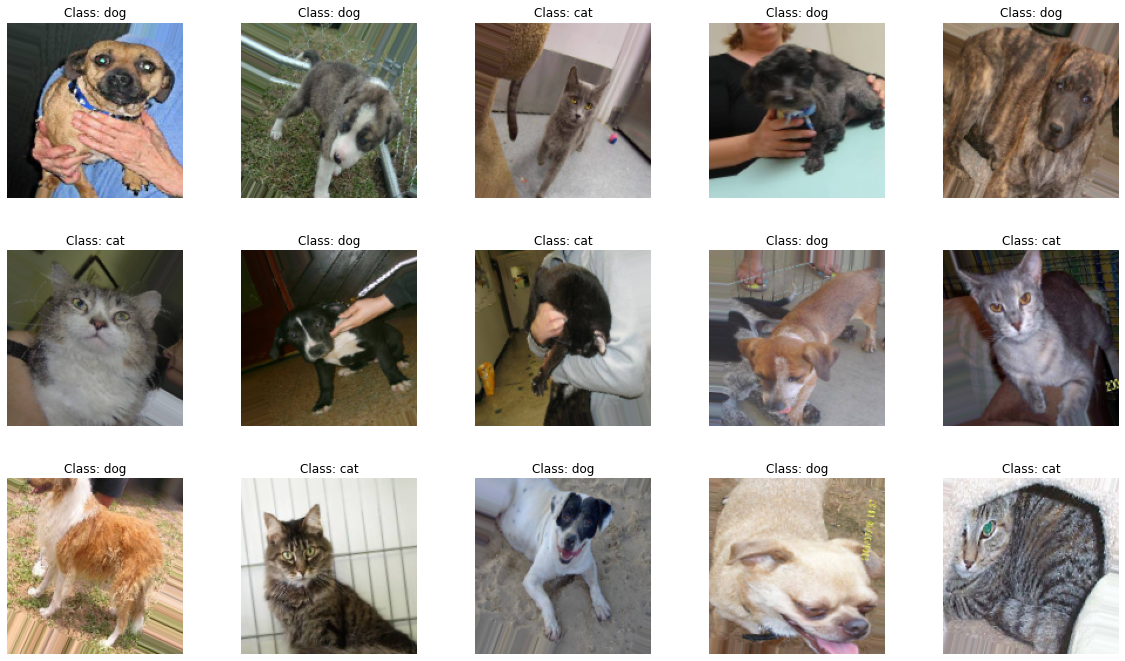

In [6]:
labels = ['cat', 'dog']

samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

# Building and compiling our CNN model

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(img_size,img_size,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.compile(optimizer= 'nadam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

# Fitting our model on training and validation set

In [10]:
history = model.fit(train_generator, validation_data= val_generator,
                   epochs = 15)

Epoch 1/15
200/200 [==============================] - 119s 553ms/step - loss: 0.7015 - accuracy: 0.5405 - val_loss: 0.6924 - val_accuracy: 0.5069
Epoch 2/15
200/200 [==============================] - 61s 305ms/step - loss: 0.6950 - accuracy: 0.5578 - val_loss: 0.6977 - val_accuracy: 0.5444
Epoch 3/15
200/200 [==============================] - 62s 309ms/step - loss: 0.6434 - accuracy: 0.6397 - val_loss: 0.5965 - val_accuracy: 0.6837
Epoch 4/15
200/200 [==============================] - 61s 307ms/step - loss: 0.5946 - accuracy: 0.6867 - val_loss: 0.5468 - val_accuracy: 0.7250
Epoch 5/15
200/200 [==============================] - 61s 306ms/step - loss: 0.5571 - accuracy: 0.7167 - val_loss: 0.5272 - val_accuracy: 0.7294
Epoch 6/15
200/200 [==============================] - 61s 306ms/step - loss: 0.5184 - accuracy: 0.7389 - val_loss: 0.5013 - val_accuracy: 0.7594
Epoch 7/15
200/200 [==============================] - 61s 306ms/step - loss: 0.4930 - accuracy: 0.7616 - val_loss: 0.5021 - val_a

In [15]:
history_df = pd.DataFrame(history.history)
history_df 

,loss,accuracy,val_loss,val_accuracy
0,0.701479,0.540469,0.692370,0.506875
1,0.695032,0.557813,0.697663,0.544375
2,0.643440,0.639687,0.596465,0.683750
3,0.594563,0.686719,0.546849,0.725000
4,0.557139,0.716719,0.527197,0.729375
5,0.518378,0.738906,0.501306,0.759375
6,0.493023,0.761563,0.502081,0.753750
7,0.468291,0.777500,0.487066,0.765625
8,0.458401,0.786250,0.479364,0.770000
9,0.423268,0.797813,0.457486,0.783750


# Visualising accuracy and loss curves

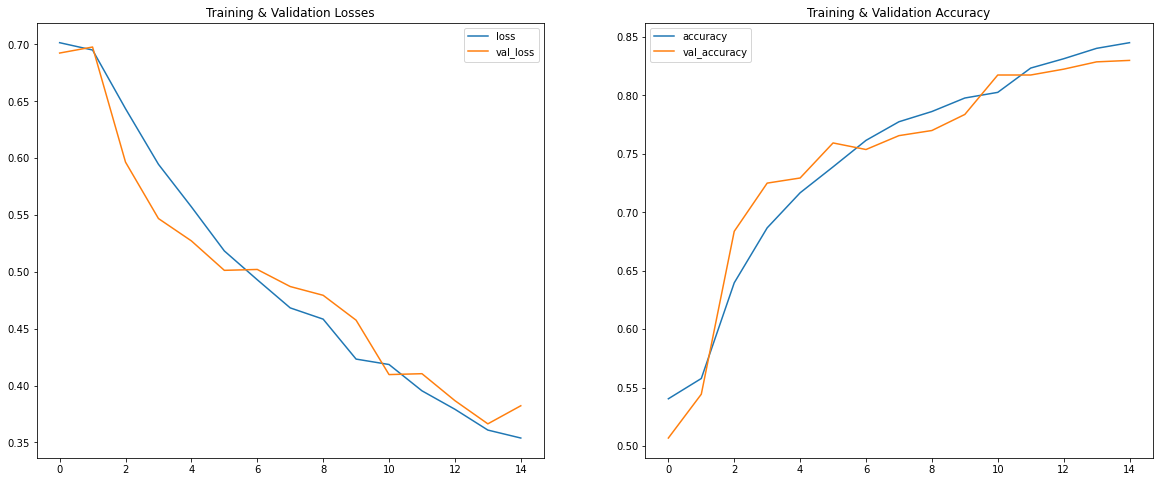

In [16]:
train_func = ['loss', 'accuracy']
valid_func = ['val_loss', 'val_accuracy']
titles = [
    'Training & Validation Losses',
    'Training & Validation Accuracy'
]

def plotting_training_result(histories, title, i=1):
    plt.subplot(1, 2, i)
    for hist in histories:
        plt.plot(range(history_df.shape[0]), history_df[hist], label=hist)
    plt.title(title, fontsize=12)
    plt.legend()

for i in range(len(train_func)):
    plotting_training_result([train_func[i], valid_func[i]], title=titles[i], i=i+1)

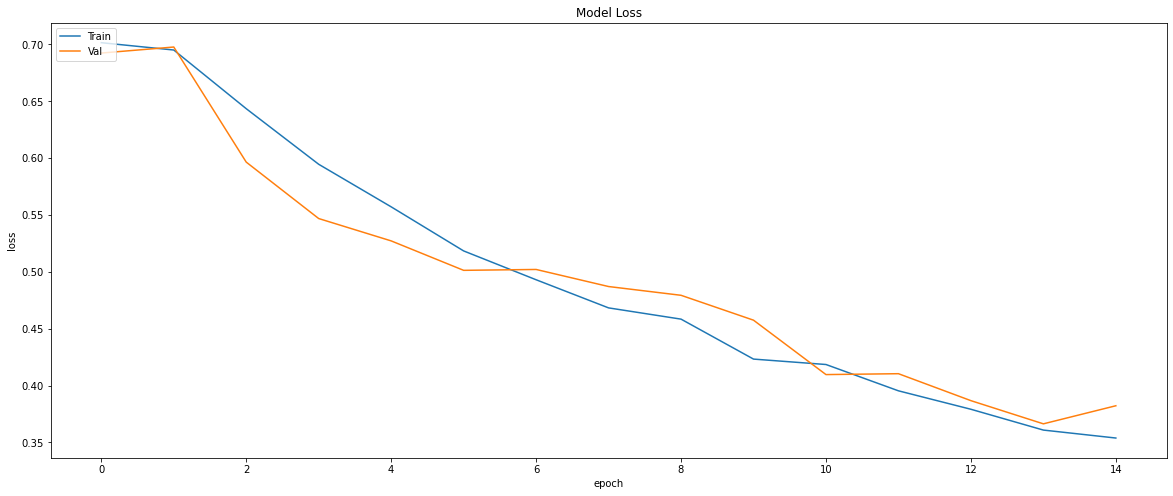

In [17]:
plt.figure(figsize =(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

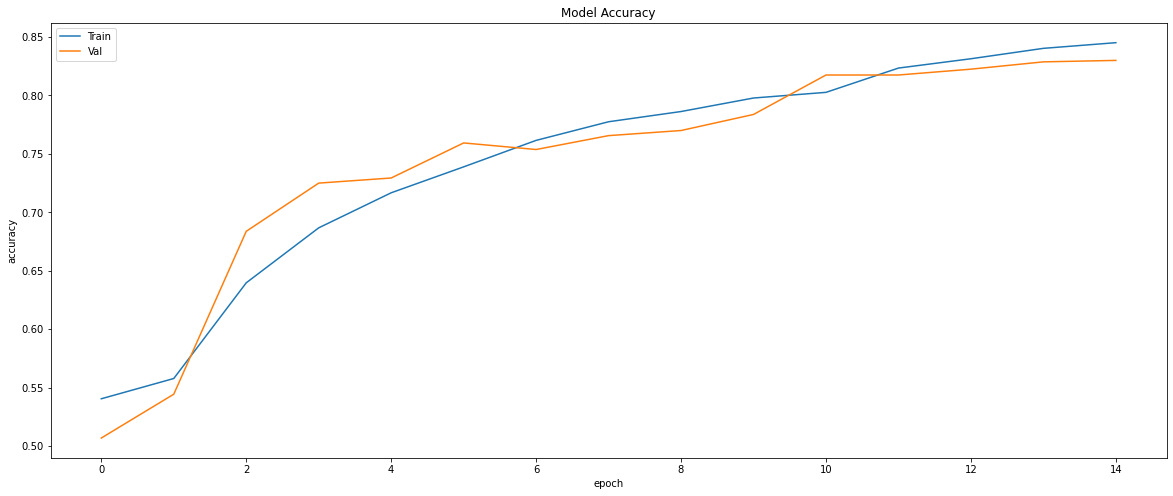

In [18]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show() 

In [21]:
classes = val_generator.classes
y_pred = model.predict(val_generator)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(classes,y_pred,target_names=labels))

In [ ]:
print(confusion_matrix(classes,y_pred))

# Evaluate our model on test data

In [ ]:
tester = model.evaluate(test_generator)
